In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df['Age'].value_counts()

Age
21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: count, Length: 79, dtype: int64

In [ ]:
df['Age'].min()

0.17

In [ ]:
df['Age'].max()

76.0

In [ ]:
df['Age'].mean()

30.272590361445783

In [ ]:
df['Age'].median()

27.0

In [ ]:
df['Age'].mode()

0    21.0
1    24.0
Name: Age, dtype: float64

In [ ]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [ ]:
df['Age'].value_counts()

Age
30.27259    86
24.00000    17
21.00000    17
22.00000    16
30.00000    15
            ..
76.00000     1
28.50000     1
22.50000     1
62.00000     1
38.50000     1
Name: count, Length: 80, dtype: int64

In [ ]:
df['Cabin'].value_counts()

Cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: count, Length: 76, dtype: int64

In [ ]:
df['Cabin']=df['Cabin'].fillna('A') # replaced Nan values with A

In [ ]:
df['Cabin'].value_counts()

Cabin
A                  327
B57 B59 B63 B66      3
C89                  2
C116                 2
C80                  2
                  ... 
E45                  1
E52                  1
B58 B60              1
C62 C64              1
C105                 1
Name: count, Length: 77, dtype: int64

In [ ]:
df['Cabin'].mode()

0    A
Name: Cabin, dtype: object

In [ ]:
df['Fare'].value_counts()

Fare
7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: count, Length: 169, dtype: int64

In [ ]:
df['Fare'].mean()

35.627188489208635

In [ ]:
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Text(0.5, 1.0, 'Pclass Vs Survived')

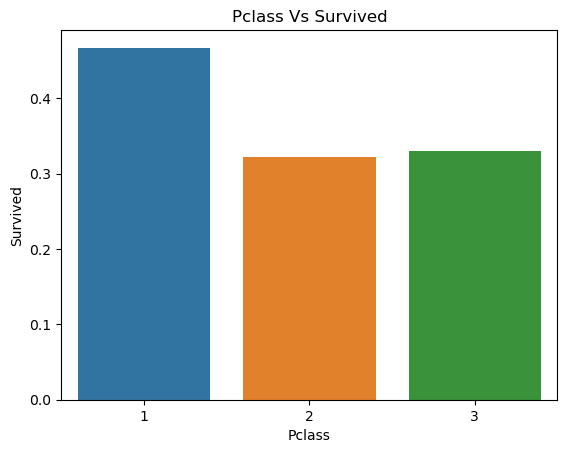

In [ ]:
sns.barplot(x=df['Pclass'],y=df['Survived'],errorbar=('ci', True))
plt.title('Pclass Vs Survived')

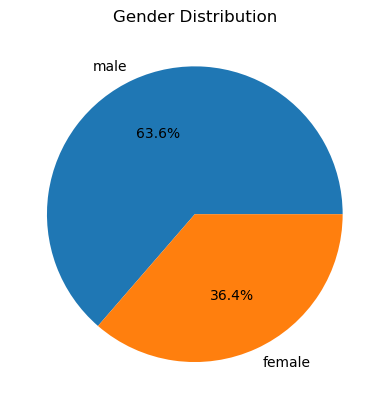

In [ ]:
gender_counts=df['Sex'].value_counts()
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()

<Axes: xlabel='Survived', ylabel='Age'>

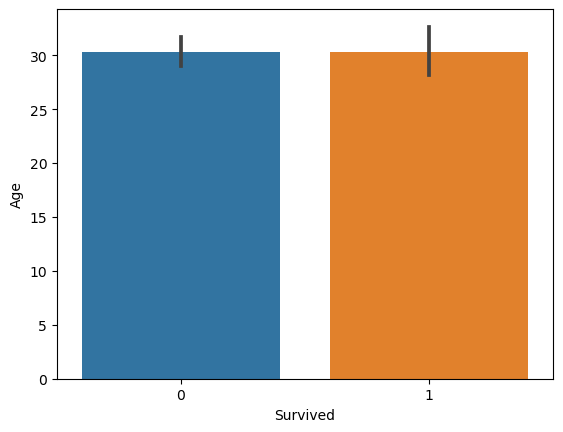

In [ ]:
sns.barplot(x=df['Survived'],y=df['Age'])

<Axes: xlabel='Survived', ylabel='Fare'>

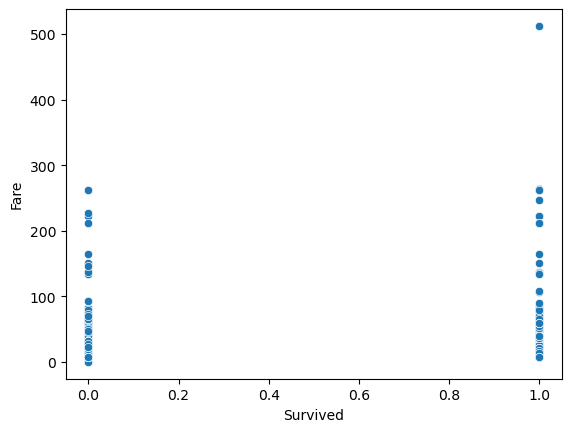

In [ ]:
sns.scatterplot(x=df['Survived'],y=df['Fare'])

<Axes: xlabel='Age', ylabel='Pclass'>

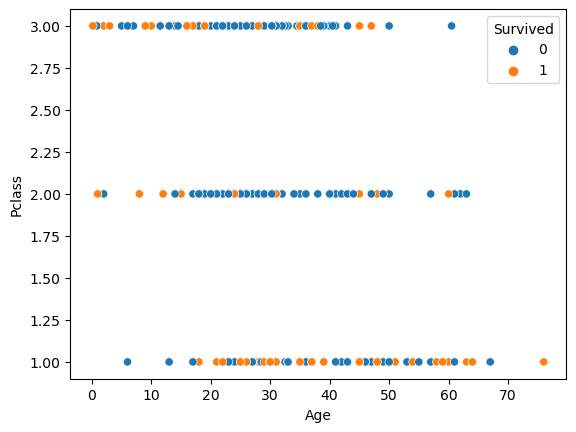

In [ ]:
sns.scatterplot(x=df['Age'],y=df['Pclass'],hue=df['Survived'])

In [ ]:
df['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [ ]:
df['Sex']=df['Sex'].replace('male',0)
df['Sex']=df['Sex'].replace('female',1)

In [ ]:
df['Sex']=df['Sex'].astype(int)

In [ ]:
df['Sex'].head()

0    0
1    1
2    0
3    0
4    1
Name: Sex, dtype: int32

In [ ]:
df['Cabin'].value_counts()

Cabin
A                  327
B57 B59 B63 B66      3
C89                  2
C116                 2
C80                  2
                  ... 
E45                  1
E52                  1
B58 B60              1
C62 C64              1
C105                 1
Name: count, Length: 77, dtype: int64

In [ ]:
df['Cabin']=df['Cabin'].str.strip('57')

In [ ]:
df['Cabin'].value_counts()

Cabin
A                  327
B57 B59 B63 B66      3
C89                  2
C116                 2
C80                  2
                  ... 
E4                   1
E52                  1
B58 B60              1
C62 C64              1
C10                  1
Name: count, Length: 77, dtype: int64

# Machine Learning

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,A,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,A,S
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,A,Q
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,A,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,A,S


In [ ]:
x=df[['Pclass','Sex','Age','Fare']]
y=df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30, random_state=10)

In [ ]:
x_train.head()

,Pclass,Sex,Age,Fare
70,3,1,24.0,7.7500
131,1,0,53.0,28.5000
17,3,0,21.0,7.2250
287,1,0,24.0,82.2667
295,3,0,26.0,7.8958


In [ ]:
y_train.head()

70     1
131    0
17     0
287    0
295    0
Name: Survived, dtype: int64

In [ ]:
x_test.head()

,Pclass,Sex,Age,Fare
362,2,1,31.00000,21.0000
154,3,0,13.00000,31.3875
47,3,0,30.27259,7.7500
100,1,1,43.00000,55.4417
187,3,0,17.00000,8.0500


In [ ]:
y_test.head()

362    1
154    0
47     0
100    1
187    0
Name: Survived, dtype: int64

In [ ]:
x_train.shape

(292, 4)

In [ ]:
y_train.shape

(292,)

In [ ]:
x_test.shape

(126, 4)

In [ ]:
y_test.shape

(126,)

In [ ]:
from sklearn.svm import SVC
clf=SVC(kernel='rbf')
clf.fit(x_train,y_train)

SVC()

In [ ]:
y_predict = clf.predict(x_test)

In [ ]:
x_test.head()

,Pclass,Sex,Age,Fare
362,2,1,31.00000,21.0000
154,3,0,13.00000,31.3875
47,3,0,30.27259,7.7500
100,1,1,43.00000,55.4417
187,3,0,17.00000,8.0500


In [ ]:
y_predict[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [ ]:
y_test[0:5]

362    1
154    0
47     0
100    1
187    0
Name: Survived, dtype: int64

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_predict))

0.5952380952380952


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_predict)

In [ ]:
cm

array([[69,  8],
       [43,  6]], dtype=int64)

# Identifying the best parameters using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameters grid for SVM
params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Create the GridSearchCV object
svm_gsv = GridSearchCV(estimator=SVC(), param_grid=params, cv=3, scoring='accuracy')

# Fit the Grid Search object on the data
svm_gsv.fit(x_train, y_train)


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [ ]:
svm_gsv.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
svm_gsv.best_estimator_

SVC(C=0.1, kernel='linear')

In [ ]:
from sklearn.svm import SVC
clf=SVC(kernel='linear')
clf.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
y_pred[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [ ]:
y_test.head()

362    1
154    0
47     0
100    1
187    0
Name: Survived, dtype: int64

In [ ]:
print(metrics.accuracy_score(y_test, y_pred))

1.0
